In [1]:
#https://github.com/pomber/covid19
print('Initializing brazilian analysis!')
import numpy as np
import pandas as pd
import folium, html, json
import matplotlib.pyplot as plt
import datetime

Initializing brazilian analysis!


In [2]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df_estados = pd.read_csv('../data/brazilian_states.csv')
df['date'] = df['date'].astype('datetime64[ns]')

today = str(df.date.max().date())
tomorrow = str(df.date.max().date() + datetime.timedelta(days=1))
yesterday = str(df.date.max().date() - datetime.timedelta(days=1))
qtdeMonitored = 10

df.tail()

,region,state,date,case_day,cases,death_day,deaths,day,%var_case_day,%var_death_day,avg7_cases,avg7_deaths,perc_death,avg7_perc_death
1297,Centro-Oeste,DF,2020-04-26,53,1066,1,27,51,120.83,0.0,34.0,0.0,2.53,2.63
1298,Centro-Oeste,DF,2020-04-27,80,1146,0,27,52,50.94,-100.0,39.0,0.0,2.36,2.58
1299,Centro-Oeste,DF,2020-04-28,67,1213,1,28,53,-16.25,0.0,47.0,0.0,2.31,2.52
1300,Centro-Oeste,DF,2020-04-29,62,1275,0,28,54,-7.46,-100.0,47.0,0.0,2.20,2.46
1301,Centro-Oeste,DF,2020-04-30,81,1356,2,30,55,30.65,0.0,56.0,0.0,2.21,2.40


In [3]:
df_brasil = pd.merge(df[df['date']==today], df_estados, how='inner', on=None, left_on='state', 
                 right_on='sigla_estado', left_index=False, right_index=False, sort=False)   

df_brasil = df_brasil[df_brasil['date']==today][['id_estado','avg7_perc_death','avg7_cases','sigla_estado','nome_estado','cases','deaths','perc_death']]
df_brasil['id_estado'] = df_brasil['id_estado'].astype('str')# para fazer o key_on no folium

df_brasil.tail()

,id_estado,avg7_perc_death,avg7_cases,sigla_estado,nome_estado,cases,deaths,perc_death
22,43,3.30,67.0,RS,Rio Grande do Sul,1466,51,3.48
23,50,3.45,9.0,MS,Mato Grosso do Sul,255,9,3.53
24,51,3.73,10.0,MT,Mato Grosso,297,11,3.70
25,52,4.30,46.0,GO,Goiás,781,29,3.71
26,53,2.40,56.0,DF,Distrito Federal,1356,30,2.21


In [4]:
state_geo = json.load(open('../data/brasil-estados.json'))
for state in state_geo['features']: 
    latLon =  state['properties']['centroide']
    codarea = state['properties']['codarea']
    df_estados.loc[df_estados['id_estado']==int(codarea),'lat'] = latLon[1]
    df_estados.loc[df_estados['id_estado']==int(codarea),'lon'] = latLon[0]

df_estados.tail()

,id_estado,nome_estado,sigla_estado,id_regiao,nome_regiao,sigla_regiao,lat,lon
22,43,Rio Grande do Sul,RS,4,Sul,S,-29.705809,-53.319974
23,50,Mato Grosso do Sul,MS,5,Centro-Oeste,CO,-20.327475,-54.845564
24,51,Mato Grosso,MT,5,Centro-Oeste,CO,-12.948919,-55.911975
25,52,Goiás,GO,5,Centro-Oeste,CO,-16.042109,-49.623608
26,53,Distrito Federal,DF,5,Centro-Oeste,CO,-15.780746,-47.797341


In [5]:
state_geo = json.load(open('../data/brasil-estados.json'))
m = folium.Map(location=[-15.75, -49.95], zoom_start=4)

# folium.Choropleth(
#     geo_data=state_geo,
#     name='Contaminações',
#     data=df_brasil,
#     columns=['id_estado', 'avg7_cases'],
#     key_on='feature.properties.codarea',
#     fill_color='PuBu',#'YlGn',
#     fill_opacity=0.7,
#     line_opacity=0.3,
#     legend_name='media movel de casos (7 ultimos dias)'
# ).add_to(m)

folium.Choropleth(
    geo_data=state_geo,
    name='Mortalidade',
    data=df_brasil,
    columns=['id_estado', 'avg7_perc_death'],
    key_on='feature.properties.codarea',
    fill_color='YlOrRd',#'YlGn',
#     ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name= '% mortalidade (media movel 7 ultimos dias)'
).add_to(m)

# for key,estado in df_estados.iterrows():
#     dados = df_brasil[df_brasil['sigla_estado']==estado.sigla_estado]
#     detalhes = '<center><b>'+dados.nome_estado.values[0] + ' (' + dados.sigla_estado.values[0] + ')</b></center>\n'
#     detalhes += 'casos: ' + str(dados.cases.values[0]) + ', mortes: ' + str(dados.deaths.values[0])
#     detalhes += ', mortalidade: ' + str(dados.perc_death.values[0]) + '%'
# #     detalhes = udetalhes
    
#     folium.CircleMarker(
#         location=[estado.lat,estado.lon],
#         radius=5,
# #         popup=detalhes,
#         color='#727b7d',
#         fill=True,
#         fill_color='#727b7d',
#         tooltip=detalhes,
#         icon=folium.Icon(color='blue',
#              icon_color='black',
#              icon='info-sign',
#              prefix='es')
#     ).add_to(m)

folium.LayerControl().add_to(m)

m.save('../analysis/maps/brazilMapDeaths.html')
m

In [6]:
m = folium.Map(location=[-15.75, -49.95], zoom_start=4)
folium.Choropleth(
    geo_data=state_geo,
    name='Contaminações',
    data=df_brasil,
    columns=['id_estado', 'avg7_cases'],
    key_on='feature.properties.codarea',
    fill_color='RdPu',#'YlGn',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='media movel de casos (7 ultimos dias)'
).add_to(m)
folium.LayerControl().add_to(m)

m.save('../analysis/maps/brazilMapCases.html')
m

In [7]:
import imgkit
print('Gerando imagens dos mapas do Brasil')
options = {
    'format': 'png',
#     'crop-h': '3',
#     'crop-w': '3',
#     'crop-x': '3',
#     'crop-y': '3',
    'width':'300',
    'encoding': "UTF-8",
    'custom-header' : [
        ('Accept-Encoding', 'gzip')
    ],
}
imgkit.from_file('../analysis/maps/brazilMapDeathsContainer.html', '../analysis/maps/brazilMapDeaths.png', options=options)
imgkit.from_file('../analysis/maps/brazilMapCasesContainer.html', '../analysis/maps/brazilMapCases.png', options=options)

Gerando imagens dos mapas do Brasil
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

----------------------------
### Brasil - Analysis and monitoring

#### Top 5 deadliest states 

In [8]:
cols = ['state', 'date', 'day','case_day', 'cases', 'death_day', 'deaths', 'avg7_cases', 'avg7_deaths','avg7_perc_death', 'perc_death']
df_top_deaths = df[df['date']==today].sort_values('avg7_perc_death', ascending = False)

df_top_deaths.reset_index(0, inplace=True)
df_top_deaths.index = df_top_deaths.index + 1
df_top_deaths = df_top_deaths[cols].head(qtdeMonitored)
df_top_deaths

,state,date,day,case_day,cases,death_day,deaths,avg7_cases,avg7_deaths,avg7_perc_death,perc_death
1,PB,2020-04-30,43,115,814,4,62,67.0,3.0,9.29,7.62
2,RJ,2020-04-30,57,584,9453,60,854,468.0,46.0,8.90,9.03
3,PE,2020-04-30,50,682,6876,27,565,479.0,36.0,8.56,8.22
4,SP,2020-04-30,65,2540,28698,128,2375,1708.0,147.0,8.40,8.28
5,AM,2020-04-30,47,453,5254,45,425,338.0,27.0,8.01,8.09
6,PR,2020-04-30,50,59,1407,1,83,46.0,3.0,6.05,5.90
7,CE,2020-04-30,45,339,7606,41,482,429.0,30.0,5.90,6.34
8,PA,2020-04-30,43,454,2876,71,208,229.0,22.0,5.71,7.23
9,PI,2020-04-30,42,59,513,0,24,42.0,1.0,5.43,4.68
10,MA,2020-04-30,41,386,3190,18,184,204.0,15.0,5.27,5.77


#### Top 5 most transmissible countries + Brazil

In [9]:
df_top_cases = df[df['date']==today].sort_values('avg7_cases', ascending = False)

df_top_cases.reset_index(0, inplace=True)
df_top_cases.index = df_top_cases.index + 1
df_top_cases = df_top_cases[cols].head(qtdeMonitored)
df_top_cases

,state,date,day,case_day,cases,death_day,deaths,avg7_cases,avg7_deaths,avg7_perc_death,perc_death
1,SP,2020-04-30,65,2540,28698,128,2375,1708.0,147.0,8.40,8.28
2,PE,2020-04-30,50,682,6876,27,565,479.0,36.0,8.56,8.22
3,RJ,2020-04-30,57,584,9453,60,854,468.0,46.0,8.90,9.03
4,CE,2020-04-30,45,339,7606,41,482,429.0,30.0,5.90,6.34
5,AM,2020-04-30,47,453,5254,45,425,338.0,27.0,8.01,8.09
6,PA,2020-04-30,43,454,2876,71,208,229.0,22.0,5.71,7.23
7,MA,2020-04-30,41,386,3190,18,184,204.0,15.0,5.27,5.77
8,ES,2020-04-30,56,358,2465,7,83,157.0,5.0,3.22,3.37
9,BA,2020-04-30,56,205,2851,8,104,151.0,6.0,3.40,3.65
10,SC,2020-04-30,49,90,2085,2,46,138.0,1.0,3.01,2.21


#### Brazilian states to be analised

#### Cases and deaths 

In [10]:
#inform the countries you want to analise
monitoredStates = df_top_deaths['state'].head(qtdeMonitored).to_numpy()
monitoredStates

array(['PB', 'RJ', 'PE', 'SP', 'AM', 'PR', 'CE', 'PA', 'PI', 'MA'],
      dtype=object)

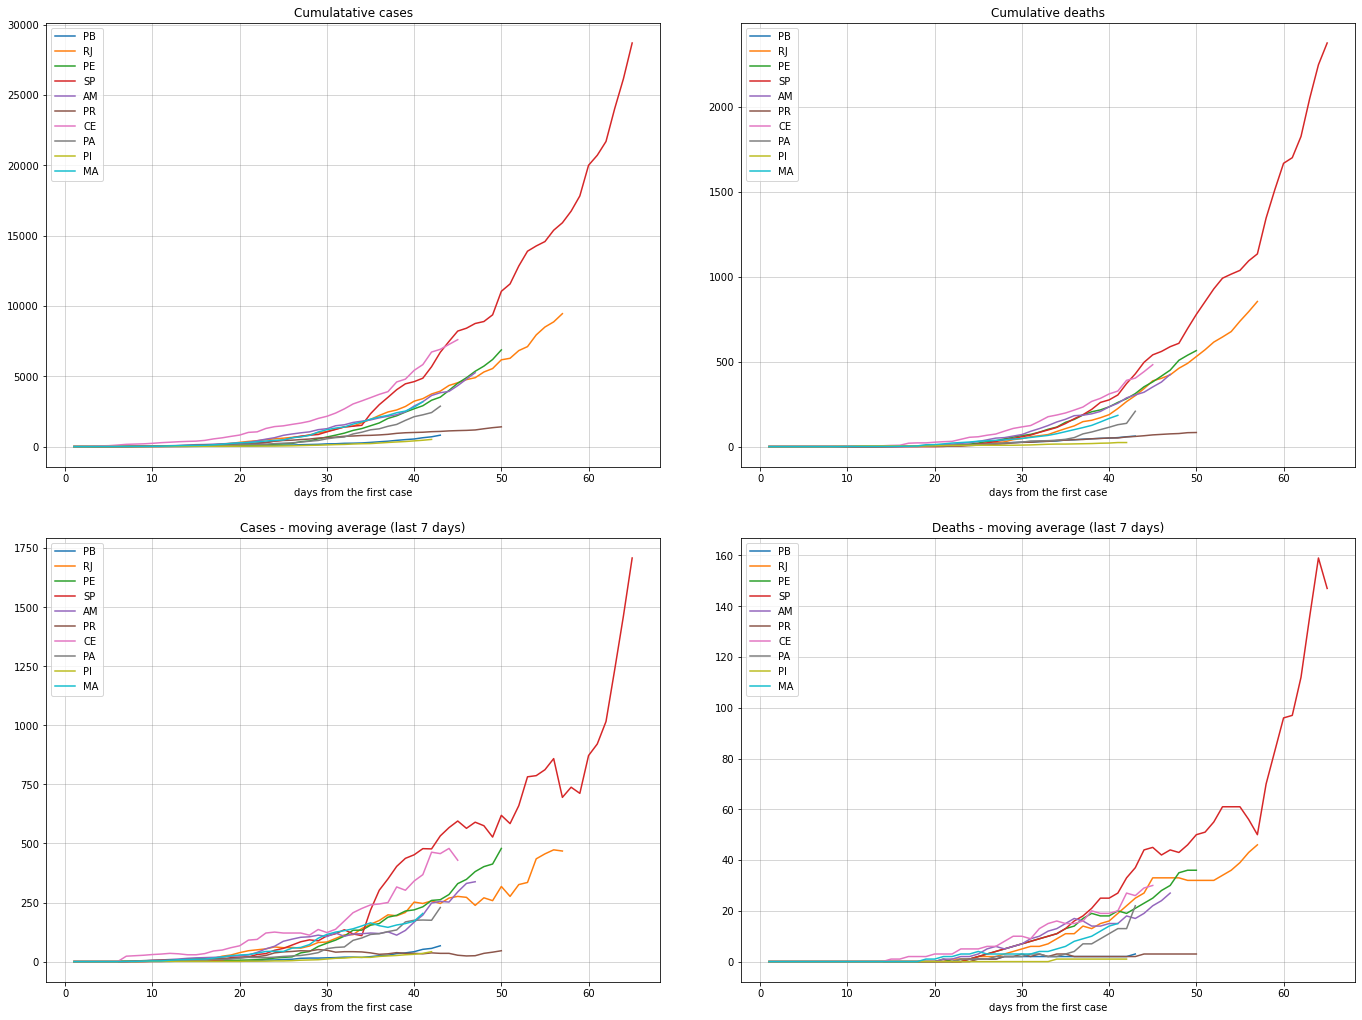

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulatative cases")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Cumulative deaths")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

ax3.set_title("Cases - moving average (last 7 days)")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)

ax4.set_title("Deaths - moving average (last 7 days)")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)

for state in monitoredStates:
    ax1.plot(df[df['state'] == state].day, df[df['state'] == state].cases, label = state)
    ax2.plot(df[df['state'] == state].day, df[df['state'] == state].deaths, label = state)
    ax3.plot(df[df['state'] == state].day, df[df['state'] == state].avg7_cases, label = state)
    ax4.plot(df[df['state'] == state].day, df[df['state'] == state].avg7_deaths, label = state)
#     ax1.plot(df[df['country'] == country].day, df[df['country'] == country].cases, label = country)
#     ax2.plot(df[df['country'] == country].day, df[df['country'] == country].deaths, label = country)
#     ax3.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_cases, label = country)
#     ax4.plot(df[df['country'] == country].day, df[df['country'] == country].avg7_deaths, label = country)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
fig.savefig('../analysis/brazilian_states_cases_deaths.png')

### Generating the markdown file

In [12]:
f = open('../analysis/README.md', 'w')

readme = '[<img src="../data/bandeiras/UK.png" width="30"  /> English version](README_EN.md)'
readme += '\n\n# **Análises e monitoramento**\n'

readme += '\n### Mortalidade dos estados brasileiros\n'
readme += 'O nível de mortalidade demonstrado no mapa é definido a partir da média móvel dos últimos 7 dias da mortalidade de cada estado.\n'
readme += '<img src="maps/brazilMapDeaths.png" width="80%"  />'

readme += '\n### Transmissão dos estados brasileiros\n'
readme += 'O nível de transmissão no mapa é definido a partir da média móvel dos últimos 7 dias da quantidade de casos acumulados de cada estado.\n\n'
readme += '<img src="maps/brazilMapCases.png" width="80%"  />'
# readme += '[![Clique aqui para o mapa atualizado](brazilMap.png)](brazilMap.html)'

readme += '\n\nEstas análises são relativas aos dados da pandemia Covid19 no Brasil até a data de **' + today + '**.\n\n'
readme += 'Como existem muitos estados, colocar em um único gráfico todos seus dados tornaria a leitura e compreensão inviáveis, desta forma, foram selecionados os ' + str(qtdeMonitored) + ' mais mortais:'
readme += str(monitoredStates) + '.\n\n'
readme += '\n***Dica**: você mesmo pode alterar neste notebook quais estados você prefere comparar.*\n\n'
readme += '## Top ' + str(qtdeMonitored) + ' estados mais mortais do Brasil\n'
readme += df_top_deaths.to_markdown()
# readme += tabulate(df_top_deaths.values,df_top_deaths.columns, tablefmt="pipe")
readme += '\n\n\n ## Top ' + str(qtdeMonitored) + ' estados mais transmissíveis do Brasil\n'
readme += df_top_cases.to_markdown()
#tabulate(df_top_cases.values,df_top_cases.columns, tablefmt="pipe")

readme += '\n----------------------\n'
readme += '## Casos e mortes\n'
readme += '![](brazilian_states_cases_deaths.png)'

readme += '\n\n [Comparativos do Brasil com outro países do mundo podem ser encontratos aqui.](https://github.com/rafaelcastellar/coronavirus/blob/master/analysis/README_WORLD.md#an%C3%A1lises-do-brasil)'


f.write(readme)
f.close()

###########################################

f = open('../analysis/README_EN.md', 'w')
readme = '[<img src="../data/bandeiras/PT.png" width="30"   /> Versão em português](README.md)'

readme += '\n\n# **Analysis and monitoring**\n'

readme += '\n### Mortality of the brazilian states\n'
readme += 'The mortality level shown in this map is defined from the moving average of the last 7 days of each state mortality.\n'
readme += '<img src="maps/brazilMapDeaths.png" width="80%"  />'
# readme += '[![Click here for updated map](brazilMap.png)](brazilMap.html)'

readme += '\n### Transmission of the brazilian states\n'
readme += 'O level of transmission on the map is defined from the moving average of the last 7 days of the cumulative cases of each state.\n'
readme += '<img src="maps/brazilMapCases.png" width="80%"  />'
# readme += '[![Clique aqui para o mapa atualizado](brazilMap.png)](brazilMap.html)'

readme += '\n\nThese analysis are related to Brazil Convid19 pandemic data up to **' + today + '**.\n\n'
readme += 'As there are too many states to have their data plotted together, were selected the ' + str(qtdeMonitored) + ' deadliest:'
readme += str(monitoredStates) + '.\n\n'
readme += '\n***Tip**: you can yourself select in this notebook which states you prefer to compare.*\n\n'
readme += '## Top ' + str(qtdeMonitored) + ' deadliest states of Brazil\n'
readme += df_top_deaths.to_markdown()
# readme += tabulate(df_top_deaths.values,df_top_deaths.columns, tablefmt="pipe")
readme += '\n\n\n ## Top ' + str(qtdeMonitored) + ' most transmissible states of Brazil\n'
readme += df_top_cases.to_markdown()
#tabulate(df_top_cases.values,df_top_cases.columns, tablefmt="pipe")

readme += '\n----------------------\n'
readme += '## Cases and deaths\n'
readme += '![](brazilian_states_cases_deaths.png)'

readme += '\n\n [Comparison of Brazil among other contries around the world can be found here.](https://github.com/rafaelcastellar/coronavirus/blob/master/analysis/README_WORLD_EN.md#brazils-analysis)'
f.write(readme)
f.close()
print('Brazilian analysis done!')

Brazilian analysis done!


In [13]:
# df[df['state']=='SP'][['date','death_day']]